### MNIST Dataset
> - 우체국에서 여러 필체에서 우편번호를 식별하는데서 유래
> - 28x28 pixel, 28*28 = 784, 흑백
> - 해당 픽셀에 있으면 진함에 따라 1,2,3 .. 식별. 없으면 0
> - X 변수는 속성 784개, Y 변수는 0~9로, one-hot 인코딩에 의해 10개의 범주 가짐

### Training epoch/batch
- one epoch : 전체 데이터 셋 한 번 트레이닝 시킨 것
- batch size : 전체 데이터 셋 중에서 메모리에 올리기 위해 가져오는 데이터 개수
- 전체 데이터 개수 1000개, batch size는 500이면, one epoch를 위해서 batch는 2번

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 2.778309996
Epoch: 0002 cost = 1.106518517
Epoch: 0003 cost = 0.894716124
Epoch: 0004 cost = 0.785319541
Epoch: 0005 cost = 0.712885573
Epoch: 0006 cost = 0.660967739
Epoch: 0007 cost = 0.620209667
Epoch: 0008 cost = 0.588929950
Epoch: 0009 cost = 0.562263391
Epoch: 0010 cost = 0.540662336
Epoch: 0011 cost = 0.521439583
Epoch: 0012 cost = 0.505124783
Epoch: 0013 cost = 0.490902563
Epoch: 0014 cost = 0.478064985
Epoch: 0015 cost = 0.466770044
Learning finished
Accuracy:  0.8838
Label:  [6]
Prediction:  [6]


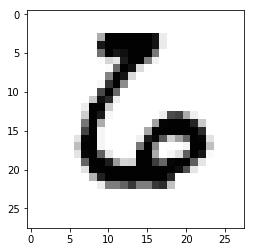

In [2]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # Y값을 자동으로 one-hot으로 읽어옴

nb_classes = 10 # 출력값은 0~9 숫자이므로 10개의 범주

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b) # matrix 곱

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) # cost는 cross_entropy
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size = 100 # 한 번에 메모리에 올릴 필요 없으므로 100개의 데이터 가져와라.

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs): # 전체 데이터는 15번 트레이닝
        
        avg_cost = 0
        # ex) 10000개 데이터, batch size = 100 => 10000/100 = 100번
        total_batch = int(mnist.train.num_examples / batch_size)
        
        # 일반적인 학습 방법 : 메모리 크기를 고려해서 학습.
        # 한 번 batch해서 학습할 때마다 w값은 새로 할당됨.
        # 100개 가져와서 cost 최소화 시키는 w 학습하고, 또 100개 가져와서 그 상태에서
        # cost 최소화 시키는 w 학습
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) # next batch
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test the model using test sets
    # sess.run() 대신 accuracy.eval()을 통해 tense 실행. 하나만 실행할 때는 a.eval
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    # training/test data 모두 Y는 one-hot 으로 
    r = random.randint(0, mnist.test.num_examples - 1)
    # mnist.test.labels는 one-hot => argmax(data, axis=1) : 큰 값의 index return
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], axis=1))) # axis=1 은 열 기준
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()